In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/distan_lat43.302lon-8.377p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
import pandas as pd
import numpy as np

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/LECOY2018Y2022.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M                  83.07%
-RA                 4.35%
BCFG                2.48%
FG                  1.87%
BR                  1.35%
RA                  1.30%
-DZ                 0.75%
-RA BR              0.57%
VCFG                0.55%
SHRA                0.48%
-SHRA               0.33%
BR BCFG             0.33%
PRFG                0.28%
RA BR               0.24%
DZ                  0.19%
-DZ BR              0.13%
-RA BCFG            0.13%
VCSH                0.12%
-RADZ               0.11%
+RA                 0.09%
FZFG                0.08%
+SHRA               0.07%
-DZ BCFG            0.06%
VCTS                0.06%
BCFG MIFG           0.05%
MIFG                0.05%
BR -DZ              0.04%
RA BCFG             0.04%
BCFG -DZ            0.04%
-RA BR BCFG         0.04%
RADZ                0.03%
PRFG BCFG           0.03%
-RA FG              0.03%
DZ BR               0.03%
SHGR                0.03%
BR -RA              0.03%
BCFG BR             0.02%
BR DZ               0.02%
+RA BR      

In [3]:
#label ra/dz

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(50))
print("*****************************")
station["prec_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o    prec_l
time                                   
2018-05-19 01:00:00         M  No RA/DZ
2021-03-28 23:30:00         M  No RA/DZ
2018-09-14 17:30:00         M  No RA/DZ
2018-03-17 15:30:00         M  No RA/DZ
2019-10-02 05:30:00         M  No RA/DZ
2018-12-14 12:30:00       -DZ     RA/DZ
2018-05-07 18:30:00        BR  No RA/DZ
2020-08-16 16:00:00     RA BR     RA/DZ
2018-06-06 03:00:00         M  No RA/DZ
2021-05-05 13:00:00         M  No RA/DZ
2020-03-06 11:00:00         M  No RA/DZ
2021-11-21 18:00:00         M  No RA/DZ
2021-02-22 23:00:00         M  No RA/DZ
2020-11-24 09:30:00         M  No RA/DZ
2021-10-29 23:30:00       -RA     RA/DZ
2021-05-17 23:30:00         M  No RA/DZ
2018-09-11 01:00:00        FG  No RA/DZ
2019-06-02 15:30:00         M  No RA/DZ
2019-03-02 00:00:00         M  No RA/DZ
2018-11-22 13:30:00       -RA     RA/DZ
2022-06-23 00:30:00         M  No RA/DZ
2019-01-11 07:00:00         M  No RA/DZ
2019-02-10 01:00:00       -RA     RA/DZ


No RA/DZ    91%
RA/DZ        9%
Name: prec_l, dtype: object

**Load model**

In [4]:
#Forecast d
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD0Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,215.747849,0.0,902.306519,5.105255,13.569287,102718.562500,283.712128,0.804692,24051.365234,14.114291,...,0.000000,-0.000477,0.20000,0.000000,0.000000,0.200000,5563.714844,1548.354980,248.946930,273.993866
2018-01-01 02:00:00,215.917984,0.0,914.343018,5.875232,14.852463,102704.343750,284.151947,0.809324,24039.359375,16.504606,...,3.170000,-34.650459,0.20000,0.000000,0.000000,0.200000,5569.226074,1547.240967,249.484375,273.890198
2018-01-01 03:00:00,223.666367,0.0,940.227722,5.960269,14.331568,102696.648438,284.475311,0.807002,24040.320312,17.431562,...,17.260000,-24.117239,0.30000,0.101562,0.000000,0.300000,5577.497070,1547.338013,249.928879,273.821869
2018-01-01 04:00:00,228.431320,0.0,956.362671,6.237044,15.082509,102694.281250,284.740265,0.815113,24042.085938,17.804031,...,30.129999,-19.603157,0.30000,0.429688,0.000000,0.429688,5584.778809,1548.901001,250.126190,273.762177
2018-01-01 05:00:00,233.394775,0.0,1000.156311,6.957641,15.846083,102686.031250,285.119202,0.827759,24040.648438,18.838913,...,50.369999,-10.988547,0.20000,0.000000,0.000000,0.200000,5587.893066,1549.415039,250.114441,274.289764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,196.194504,0.0,1728.410522,6.787476,15.680066,101285.656250,286.803375,0.799586,24039.525391,24.996758,...,0.000000,0.000188,0.30000,0.000000,0.328125,0.328125,5544.549805,1437.326050,255.119003,278.081055
2022-12-31 20:00:00,196.235443,0.0,1765.730835,7.008511,15.354391,101351.742188,286.676361,0.757733,24039.185547,30.592403,...,0.000000,0.000438,0.20000,0.000000,0.218750,0.218750,5547.923828,1442.520996,254.816254,278.311188
2022-12-31 21:00:00,191.455536,0.0,1723.741089,7.775247,17.001736,101384.421875,286.187012,0.787016,24044.787109,28.796240,...,0.000000,-0.000937,0.10000,0.000000,0.242188,0.242188,5549.165039,1447.194946,254.677689,278.057617


In [5]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o"]).dropna()
df_all1k.sample(20)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2019-03-11 12:00:00,No RA/DZ,33.981445,0.0,1598.298096,1.524093,1.633295,103294.382812,288.847992,0.499547,24215.302734,...,0.000000,0.000051,0.108715,0.000000,0.000000,0.108715,5721.057129,1603.047852,255.065689,279.610382
2018-01-17 05:00:00,No RA/DZ,297.789154,0.0,1185.140381,3.224372,7.094707,102987.070312,284.355560,0.790544,24035.648438,...,27.469999,-2.501965,0.000000,0.832323,0.000000,0.832323,5698.700195,1565.110474,258.131317,273.254150
2022-12-28 04:00:00,No RA/DZ,191.926620,0.0,1815.841797,5.516686,14.222160,102228.031250,284.407135,0.869582,24036.888672,...,0.000000,-0.000324,0.800000,0.000000,0.000000,0.800000,5629.418945,1515.838013,256.773376,278.936249
2022-06-20 10:00:00,RA/DZ,244.045547,0.0,1784.162476,2.007830,2.979980,101247.906250,288.828064,0.756248,22461.886719,...,22.459999,-5.587750,0.600000,0.156250,0.449219,0.600000,5544.410156,1438.454712,255.508438,278.408264
2020-06-19 04:00:00,No RA/DZ,197.485809,0.0,2086.247559,1.904698,3.881477,101931.000000,281.937622,0.999952,24040.759766,...,0.000000,0.000090,0.000000,0.111312,0.000000,0.111312,5669.521973,1496.362427,259.305817,280.937683
2021-12-24 20:00:00,No RA/DZ,197.193787,0.0,1675.351074,5.085672,12.718858,100136.242188,285.543060,0.854311,24036.748047,...,21.510000,-90.573318,0.300000,0.000000,0.100000,0.300000,5395.874023,1332.364014,250.736694,279.048492
2021-10-01 07:00:00,No RA/DZ,195.177032,0.0,2423.221191,1.881741,3.414634,102161.453125,286.957550,0.935217,24042.115234,...,0.000000,-0.001406,0.000000,0.400000,0.000000,0.400000,5725.356934,1541.504395,259.893433,283.595306
2018-07-13 08:00:00,No RA/DZ,28.902164,0.0,2521.523438,1.050756,1.794395,101579.507812,295.313568,0.678650,24071.886719,...,132.539993,-368.771729,0.000000,0.000000,0.000000,0.000000,5711.695801,1511.841187,258.159302,288.047638
2018-08-25 14:00:00,No RA/DZ,344.930206,0.0,2492.019531,4.364803,5.278830,102074.546875,294.514069,0.654496,24210.390625,...,0.000000,0.000465,0.000000,0.000000,0.000000,0.000000,5774.996094,1534.550415,265.179932,284.162689


**Scatter plot significant meteorological variables and prec_l**

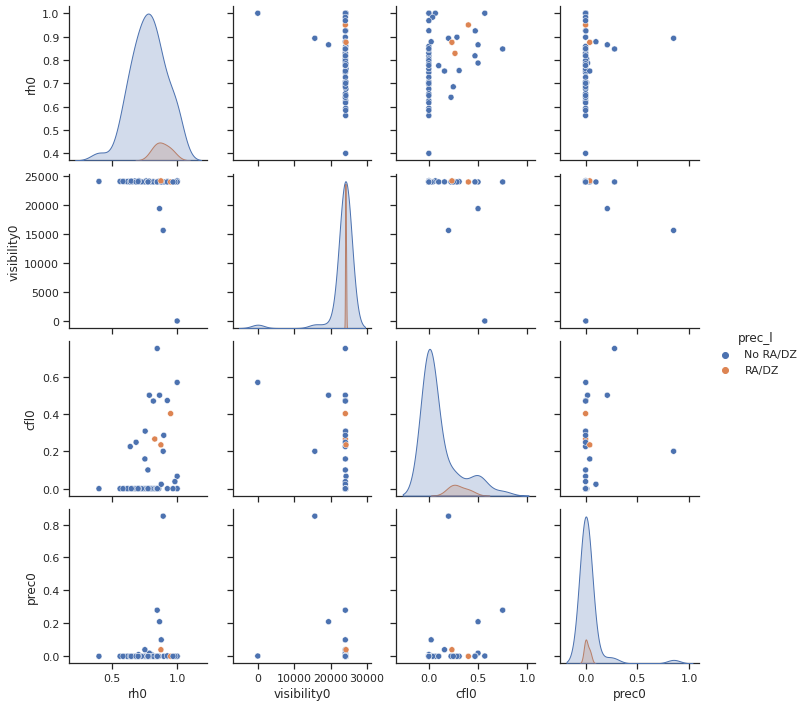

In [6]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["prec_l","rh0","visibility0","cfl0","prec0"]].sample(50), hue="prec_l");

**Scatter plot 3 PCA variables and prec_l**

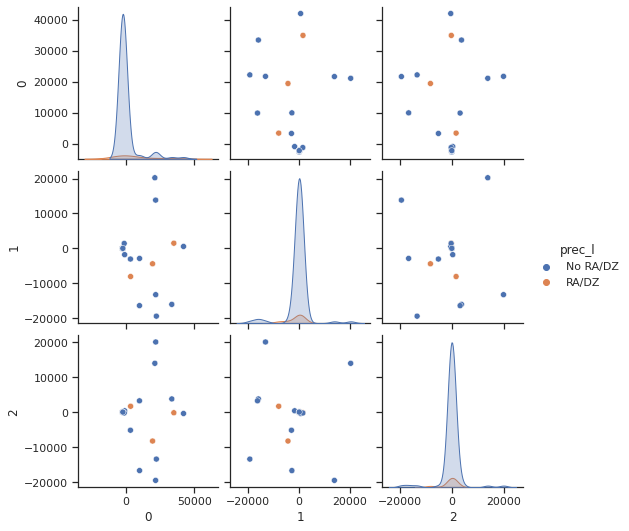

In [7]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["prec_l"] = df_all1k.prec_l
sns.pairplot(df_pca.sample(100), hue="prec_l");

**Meteorological model score Heidke Skill Score (HSS)**

In [8]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec1])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

HSS point 0
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     27687   9830  37517
RA/DZ          668   2644   3312
All          28355  12474  40829
Heidke Skill Score: 0.24

Quality report Meteorological model point 0
              precision    recall  f1-score       support
No RA/DZ       0.976442  0.737985  0.840630  37517.000000
RA/DZ          0.211961  0.798309  0.334980   3312.000000
accuracy       0.742879  0.742879  0.742879      0.742879
macro avg      0.594201  0.768147  0.587805  40829.000000
weighted avg   0.914428  0.742879  0.799613  40829.000000

HSS point 1
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     28107   9410  37517
RA/DZ          644   2668   3312
All          28751  12078  40829
Heidke Skill Score: 0.25

Quality report Meteorological model point 1
              precision    recall  f1-score       support
No RA/DZ       0.977601  0.749180  0.848283  37517.000000
RA/DZ          0.220897  0.805556  0.3467

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [9]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")


p-value: 0.0
Significance level: 0.01
Degres of of freedom:  1
Stadistic 4493.187043360122
Reject H0,There is an association between machine learning forecast and observed values


In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:10<00:00,  2.44s/it]


In [ ]:
models

**ML LGBMClassifier**

In [10]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '


Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      7045    460  7505
RA/DZ          341    320   661
All           7386    780  8166
Heidke Skill Score: 0.39

Quality report (Machine Learning)

              precision    recall  f1-score     support
No RA/DZ       0.953832  0.938708  0.946209  7505.00000
RA/DZ          0.410256  0.484115  0.444136   661.00000
accuracy       0.901910  0.901910  0.901910     0.90191
macro avg      0.682044  0.711411  0.695173  8166.00000
weighted avg   0.909832  0.901910  0.905569  8166.00000

Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      7029    480  7509
RA/DZ          311    346   657
All           7340    826  8166
Heidke Skill Score: 0.41

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.957629  0.936077  0.946730  7509.000000
RA/DZ          0.418886  0.526

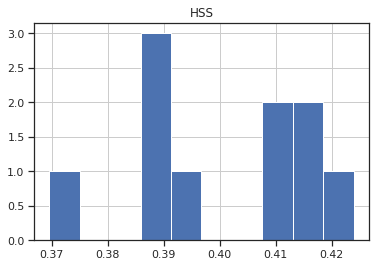

In [11]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();


**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.23) and at point 1 (0.26). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [12]:
import scipy.stats as stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.26, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")





alpha:  0.01

HSS list from machine learning test: [0.39 0.41 0.37 0.39 0.41 0.39 0.41 0.41 0.42 0.4 ]

p_value point 0: 2.834686827737e-10

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [13]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

In [ ]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

In [14]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      7074    431  7505
RA/DZ          348    313   661
All           7422    744  8166
Heidke Skill Score: 0.39

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.953112  0.942572  0.947813  7505.000000
RA/DZ          0.420699  0.473525  0.445552   661.000000
accuracy       0.904604  0.904604  0.904604     0.904604
macro avg      0.686906  0.708048  0.696682  8166.000000
weighted avg   0.910016  0.904604  0.907157  8166.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      7080    429  7509
RA/DZ          338    319   657
All           7418    748  8166
Heidke Skill Score: 0.4

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.954435  0.942869  0.948617  7509.000000
RA/DZ          0.426471  0.

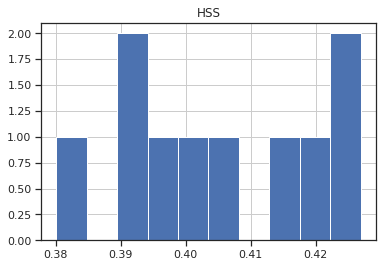

In [15]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [16]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.391 0.414 0.37  0.391 0.409 0.388 0.413 0.409 0.424 0.396]

HSS with time variables: [0.394 0.403 0.38  0.394 0.42  0.398 0.416 0.405 0.426 0.427]

alpha:  0.01

p_value point:  0.06545117667878474

we are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables


In [17]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")
     

dir0: 1.2%
snow_prec0: 0.0%
snowlevel0: 0.7%
mod0: 0.5%
wind_gust0: 1.0%
mslp0: 1.0%
temp0: 0.8%
rh0: 1.5%
visibility0: 1.2%
lhflx0: 0.7%
lwflx0: 1.1%
conv_prec0: 0.5%
prec0: 1.4%
swflx0: 0.7%
shflx0: 0.9%
cape0: 0.7%
cin0: 1.7%
cfh0: 1.9%
cfl0: 1.2%
cfm0: 1.1%
cft0: 1.5%
HGT5000: 0.7%
HGT8500: 0.7%
T5000: 0.8%
T8500: 0.7%
dir1: 1.2%
snow_prec1: 0.0%
snowlevel1: 0.6%
mod1: 0.8%
wind_gust1: 0.8%
mslp1: 0.9%
temp1: 0.8%
rh1: 1.2%
visibility1: 0.8%
lhflx1: 1.2%
lwflx1: 1.0%
conv_prec1: 0.6%
prec1: 1.5%
swflx1: 0.7%
shflx1: 0.9%
cape1: 0.8%
cin1: 0.9%
cfh1: 1.2%
cfl1: 1.5%
cfm1: 1.5%
cft1: 1.4%
HGT5001: 0.4%
HGT8501: 0.6%
T5001: 0.9%
T8501: 0.6%
dir2: 1.3%
snow_prec2: 0.0%
snowlevel2: 0.6%
mod2: 0.6%
wind_gust2: 1.1%
mslp2: 0.9%
temp2: 0.5%
rh2: 1.2%
visibility2: 1.5%
lhflx2: 0.7%
lwflx2: 1.6%
conv_prec2: 0.5%
prec2: 1.0%
swflx2: 0.4%
shflx2: 0.8%
cape2: 0.7%
cin2: 1.3%
cfh2: 1.6%
cfl2: 1.1%
cfm2: 1.5%
cft2: 0.9%
HGT5002: 0.4%
HGT8502: 0.7%
T5002: 0.7%
T8502: 0.7%
dir3: 1.5%
snow_prec3: 0.

****

**Save Machine learning model**

In [18]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LECO_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [19]:
import sklearn
print(sklearn.__version__)
print(pd.__version__)

1.2.2
1.4.4


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      7085    420  7505
RA/DZ          301    360   661
All           7386    780  8166
Heidke Skill Score: 0.45

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.959247  0.944037  0.951581  7505.000000
RA/DZ          0.461538  0.544629  0.499653   661.000000
accuracy       0.911707  0.911707  0.911707     0.911707
macro avg      0.710393  0.744333  0.725617  8166.000000
weighted avg   0.918960  0.911707  0.915000  8166.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      7087    397  7484
RA/DZ          305    377   682
All           7392    774  8166
Heidke Skill Score: 0.47

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.958739  0.946954  0.952810  7484.000000
RA/DZ          0.487080  0

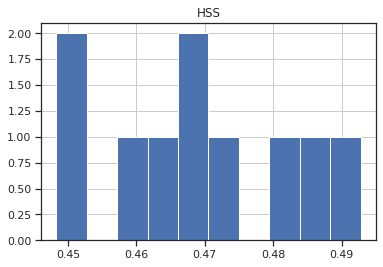

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [21]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.394 0.403 0.38  0.394 0.42  0.398 0.416 0.405 0.426 0.427]

HSS with ExtraTreesClassifier: [0.452 0.471 0.467 0.481 0.485 0.466 0.457 0.448 0.493 0.47 ]

alpha:  0.01

p_value point:  4.231386278239916e-07

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier
